### **Introduction**

Let's start with a purely mathematical example:

$$\begin{align*} \min_{x} \quad & x_1^2 + 2 x_2^2 - x_3 \\
\mathrm{s.t.} \quad & x_1 + x_2 = 1 \\
& x_1 + 2 x_2 - x_3 = 5 \\
& -10 \leq x_1, x_2, x_3 \leq 10 
\end{align*} $$

We want to solve the constrained optimization problem numerically.

In [1]:
import pyomo.environ as pe
import pyomo.opt as po
import pandas as pd
from pyomo.environ import *

In [2]:
# Create instance of concrete pemo model.
# concrete means all of the sets and model data are specified at the time of model construction.
# In this class, you'll use a concrete model.
m = pe.ConcreteModel()

## Declare variables with initial values with bounds
bnds = (-10, 10)
m.x1 = pe.Var(bounds=bnds, initialize=-2)
m.x2 = pe.Var(bounds=bnds, initialize=-2)
m.x3 = pe.Var(bounds=bnds)

## Declare objective
m.OBJ = pe.Objective(expr=m.x1**2 + 2*m.x2**2 - m.x3, sense = pe.minimize)

## Declare equality constraints
m.con1 = pe.Constraint(expr= m.x1 + m.x2 == 1)
m.con2 = pe.Constraint(expr= m.x1 + 2*m.x2 - m.x3 == 5)


## Display model
m.pprint()

3 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :   -10 :    -2 :    10 : False : False :  Reals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :   -10 :    -2 :    10 : False : False :  Reals
    x3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :   -10 :  None :    10 : False :  True :  Reals

1 Objective Declarations
    OBJ : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : x1**2 + 2*x2**2 - x3

2 Constraint Declarations
    con1 : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :   1.0 : x1 + x2 :   1.0 :   True
    con2 : Size=1, Index=None, Active=True
        Key  : Lower : Body           : Upper : Active
        None :   5.0 : x1 + 2*x2 - x3 :   5.0 :   True

6 Declarations: x1 x2 x3 OBJ con1 c

In [3]:
solver = po.SolverFactory('ipopt')
results = solver.solve(m)

print(f"x1: {pe.value(m.x1)}")
print(f"x2: {pe.value(m.x2)}")
print(f"x3: {pe.value(m.x3)}")
print(f"Obj: {pe.value(m.OBJ)}")
print("-----------------------------------------------------------")
print(results)

x1: 0.49999999996668254
x2: 0.5000000000333173
x3: -3.4999999999666827
Obj: 4.25
-----------------------------------------------------------

Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 3
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.6.1\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.12957143783569336
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



----

##### The importance of the initialization

Suppose we have the following function to maximize:
$$\begin{align*} \max \quad & cos(x + 1) + cos(x) * cos(y) \\
& -5 \leq x, y \leq 5 
\end{align*} $$


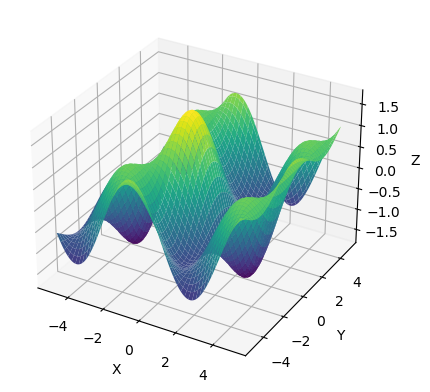

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Calculate the function values
Z = np.cos(X + 1) + np.cos(X) * np.cos(Y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the function surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()


In [5]:
model = pe.ConcreteModel()

# Initializing x and y in (0,0)
model.x = pe.Var(bounds=(-5,5)) 
model.y = pe.Var(bounds=(-5,5))
x = model.x
y = model.y

model.obj = pe.Objective(expr = cos(x+1) + cos(x)*cos(y), sense=maximize)

solver = po.SolverFactory('ipopt')

solver.options['tol']=1e-6
solver.solve(model)

print('x=',pe.value(x))
print('y=',pe.value(y))

x= -0.49999999790726224
y= 0.0


In [6]:
model = pe.ConcreteModel()

# Initializing x and y in (-2,-2)
model.x = pe.Var(initialize=-2, bounds=(-5,5))
model.y = pe.Var(initialize=-2, bounds=(-5,5))
x = model.x
y = model.y

model.obj = pe.Objective(expr = cos(x+1) + cos(x)*cos(y), sense=maximize)

solver = po.SolverFactory('ipopt')

solver.options['tol']=1e-6
solver.solve(model)

print('x=',pe.value(x))
print('y=',pe.value(y))

x= -2.070796307837297
y= -3.1415925748454043


**IPOPT** is a local solver, a global solver which is not sensible to initialization should be used, in this case the free solver **COUENNE** could be used

In [7]:
solver = po.SolverFactory('couenne')

solver.options['tol']=1e-6
solver.solve(model)

print('x=',pe.value(x))
print('y=',pe.value(y))

x= -0.49999999999365996
y= 1.5576858828478713e-11
